In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\enmao\OneDrive - Carleton University\DATA 5000\aging.csv"

df = pd.read_csv(path)
df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Columns: 290 entries, Unnamed: 0 to spread
dtypes: float64(90), int64(197), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,country_text,start_procedures,start_cost,year,start_cost_1,start_procedure_1,cpi,cpi_5geo,cpi_7geo,...,cost_cost_dd25_1,pro_cost_dd25_1,cost_50_1,cost_cost_50_1,pro_cost_50_1,inf7_50_1,nascent,rinterest,deposit,spread
0,0,Ukraine,15.0,25.6,2004,NaN,NaN,9.048068,13.289716,13.271830,...,NaN,NaN,0.0,NaN,NaN,13.271830,NaN,1.950031,7.795909,9.605317
1,1,Mali,12.0,204.3,2004,NaN,NaN,-3.099781,1.353519,1.484597,...,NaN,NaN,0.0,NaN,NaN,1.484597,NaN,NaN,3.500000,NaN
2,2,Cameroon,11.0,193.0,2004,NaN,NaN,0.233647,2.186619,2.694524,...,NaN,NaN,0.0,NaN,NaN,2.694524,NaN,16.246422,5.000000,13.000000
3,3,Lebanon,7.0,129.7,2004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.137871,7.373334,3.435000
4,4,Slovenia,9.0,14.8,2004,NaN,NaN,3.589027,7.292399,7.533131,...,NaN,NaN,0.0,NaN,NaN,0.000000,1.901597,5.162681,3.816667,4.833334


In [2]:
df = pd.DataFrame(df)
'''
# drop unwanted columns including start_cost_1, start_procedure_1
# inplace=True ensure the modified data is saved
# axis=1 means work on column, axis=0 means work on row
df.drop(['start_cost_1', 'start_procedure_1', 'entrepreneurial_intention', 'entrepreneurship_desirable',
         'establish', 'necessity_driven', 'male', 'country_short', '', '', '', '', '', '', '', '', '', '', ], inplace=True, axis=1)

'''

'''
select multiple colunms
'''
df = df[['unemp', 'pop_retire', "cpi", "deflator",'ln_prgdp', 'growth_prgdp', 'labor', 'labor_1', 'cpi_5geo', 'deflator_5geo',
              'ln_prgdp_1', 'growth_prgdp_1', 'pop_retire_1', 'unemp_1']]
#target = df['unemp']
df.head()



,unemp,pop_retire,cpi,deflator,ln_prgdp,growth_prgdp,labor,labor_1,cpi_5geo,deflator_5geo,ln_prgdp_1,growth_prgdp_1,pop_retire_1,unemp_1
0,8.6,0.157353,9.048068,15.155654,7.477395,12.180710,66.6,66.5,13.289716,14.428472,7.355588,0.097955,0.153210,9.1
1,8.8,0.029753,-3.099781,-0.614074,5.993728,-0.981045,53.2,53.0,1.353519,3.674483,6.003539,0.041044,0.030504,8.6
2,5.1,0.033359,0.233647,1.508500,6.821986,1.060820,69.9,69.8,2.186619,2.179810,6.811378,0.013683,0.033561,6.0
3,7.9,0.073249,NaN,-2.917119,8.587699,2.933693,49.3,49.0,NaN,0.679993,8.558362,-0.017599,0.072188,8.5
4,6.3,0.152512,3.589027,3.316218,9.769965,4.195595,70.0,67.4,7.292399,6.781683,9.728009,0.027425,0.149885,6.7


In [3]:
# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)
df.head()

,unemp,pop_retire,cpi,deflator,ln_prgdp,growth_prgdp,labor,labor_1,cpi_5geo,deflator_5geo,ln_prgdp_1,growth_prgdp_1,pop_retire_1,unemp_1
0,8.6,0.157353,9.048068,15.155654,7.477395,12.180710,66.6,66.5,13.289716,14.428472,7.355588,0.097955,0.153210,9.1
1,8.8,0.029753,-3.099781,-0.614074,5.993728,-0.981045,53.2,53.0,1.353519,3.674483,6.003539,0.041044,0.030504,8.6
2,5.1,0.033359,0.233647,1.508500,6.821986,1.060820,69.9,69.8,2.186619,2.179810,6.811378,0.013683,0.033561,6.0
3,7.9,0.073249,5.709205,-2.917119,8.587699,2.933693,49.3,49.0,6.424401,0.679993,8.558362,-0.017599,0.072188,8.5
4,6.3,0.152512,3.589027,3.316218,9.769965,4.195595,70.0,67.4,7.292399,6.781683,9.728009,0.027425,0.149885,6.7


In [ ]:

'''
# show the column with missing values
is_null = df.isnull().sum() 

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
df.info()


# convert categorical variable into dummy variables
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.info()
'''

In [4]:
# our target variable is 'unemp'
y = df['unemp']
X = df.drop('unemp', axis=1)

# one way to split the data into train and test 
'''
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]
'''
# an alternative way
from sklearn.model_selection import train_test_split
# split into X_train and X_test
# random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
# If you don't set a seed, it is different each time.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(1619, 13) (405, 13) (1619,) (405,)


In [5]:
# use minMax scaler to avoid the case that a variable may have large impact on the prediction variable only because of its scale
# minmax scaler is required used to transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [6]:
# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Use the Sequential API to build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
# model.add(Dense(1, activation='linear')) # output node
model.add(Dense(1, activation='linear')) # output node, output results by sigmoid activation function is not ideal 
model.summary() # see what your model looks like

# compile the model
# as this is a regression problem, the metrics of Mean Absolute Error among a list of Keras Regression Metrics is selected 
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              14000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 640,001
Trainable params: 640,001
Non-trainable params: 0
_________________________________________________________________


In [7]:
# early stopping callback to prevent overfitting (patience of 50)
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [8]:
# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=100,
                    batch_size=50,
                    verbose=1)

Epoch 1/100
33/33 [==============================] - 2s 22ms/step - loss: 28.4311 - mae: 3.6320 - val_loss: 23.5710 - val_mae: 4.5576
Epoch 2/100
33/33 [==============================] - 0s 15ms/step - loss: 9.1619 - mae: 2.3155 - val_loss: 9.9663 - val_mae: 2.5953
Epoch 3/100
33/33 [==============================] - 0s 14ms/step - loss: 5.9699 - mae: 1.8691 - val_loss: 2.3346 - val_mae: 1.2546
Epoch 4/100
33/33 [==============================] - 1s 15ms/step - loss: 3.7972 - mae: 1.4735 - val_loss: 2.8833 - val_mae: 1.2518
Epoch 5/100
33/33 [==============================] - 0s 15ms/step - loss: 4.7746 - mae: 1.6181 - val_loss: 4.2470 - val_mae: 1.8910
Epoch 6/100
33/33 [==============================] - 0s 14ms/step - loss: 4.2655 - mae: 1.5483 - val_loss: 8.6505 - val_mae: 2.4220
Epoch 7/100
33/33 [==============================] - 1s 16ms/step - loss: 3.9191 - mae: 1.4605 - val_loss: 1.2683 - val_mae: 0.7530
Epoch 8/100
33/33 [==============================] - 1s 17ms/step - loss: 

33/33 [==============================] - 0s 13ms/step - loss: 2.0362 - mae: 0.9334 - val_loss: 1.2421 - val_mae: 0.6833
Epoch 63/100
33/33 [==============================] - 0s 14ms/step - loss: 2.1939 - mae: 1.0143 - val_loss: 1.1348 - val_mae: 0.6448
Epoch 64/100
33/33 [==============================] - 0s 12ms/step - loss: 1.9091 - mae: 0.8964 - val_loss: 2.1545 - val_mae: 1.1580
Epoch 65/100
33/33 [==============================] - 0s 13ms/step - loss: 1.7986 - mae: 0.8546 - val_loss: 1.2788 - val_mae: 0.7660
Epoch 66/100
33/33 [==============================] - 0s 13ms/step - loss: 2.0700 - mae: 0.9244 - val_loss: 3.2368 - val_mae: 1.2958
Epoch 67/100
33/33 [==============================] - 0s 13ms/step - loss: 1.9894 - mae: 0.9536 - val_loss: 1.4764 - val_mae: 0.8526
Epoch 68/100
33/33 [==============================] - 0s 13ms/step - loss: 1.9903 - mae: 0.9056 - val_loss: 1.7858 - val_mae: 0.8543
Epoch 69/100
33/33 [==============================] - 0s 13ms/step - loss: 1.7448 

13/13 [==============================] - 0s 4ms/step


C:\Users\enmao\AppData\Local\Temp\ipykernel_2628\2331810883.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\enmao\AppData\Local\Temp\ipykernel_2628\2331810883.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

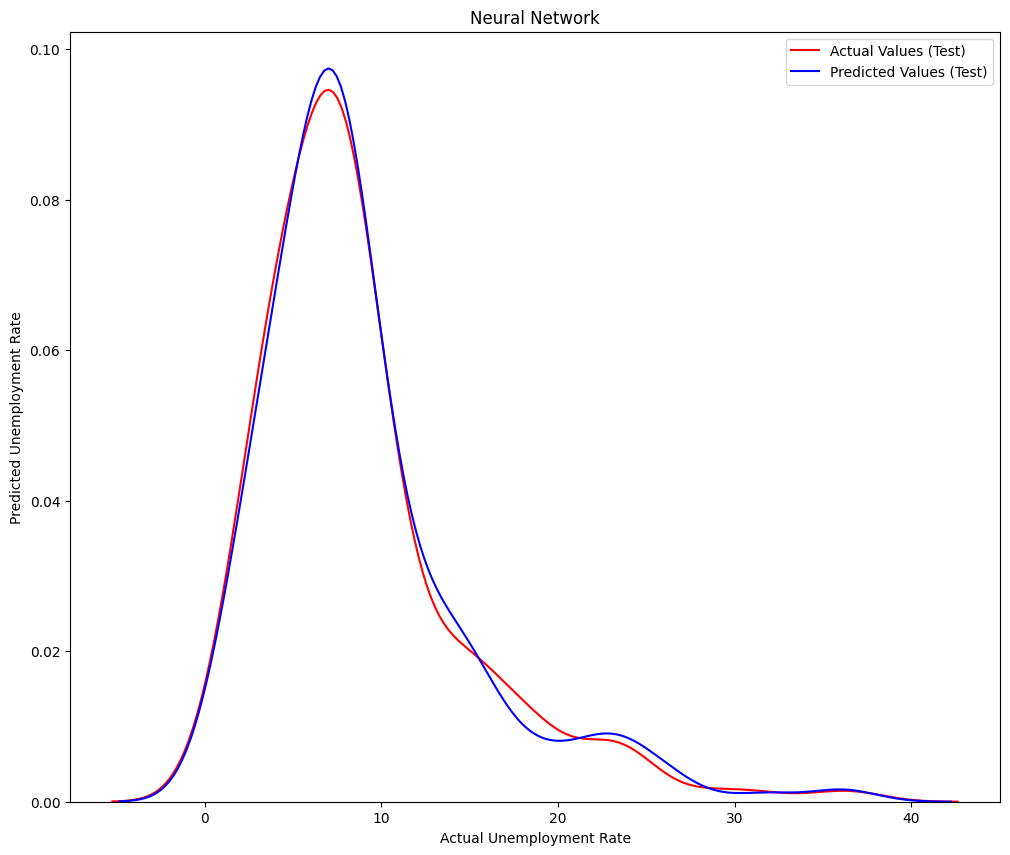

In [10]:
import seaborn as sns
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Actual Unemployment Rate')
    plt.ylabel('Predicted Unemployment Rate')
    
    plt.legend() 
    plt.show()
    plt.close()
    
Title = 'Neural Network'
DistributionPlot(y_test, model.predict(X_test), "Actual Values (Test)", "Predicted Values (Test)", Title)

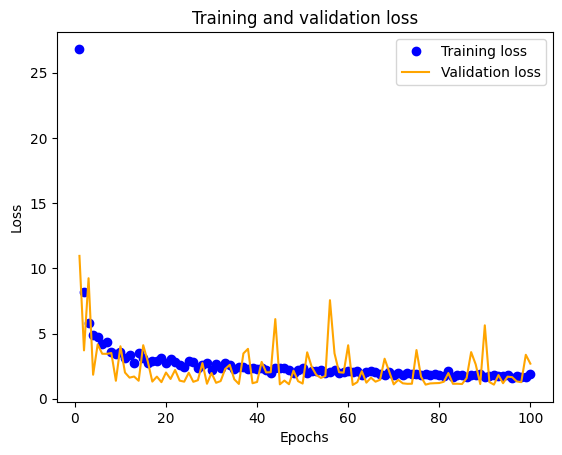

In [14]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 5ms/step


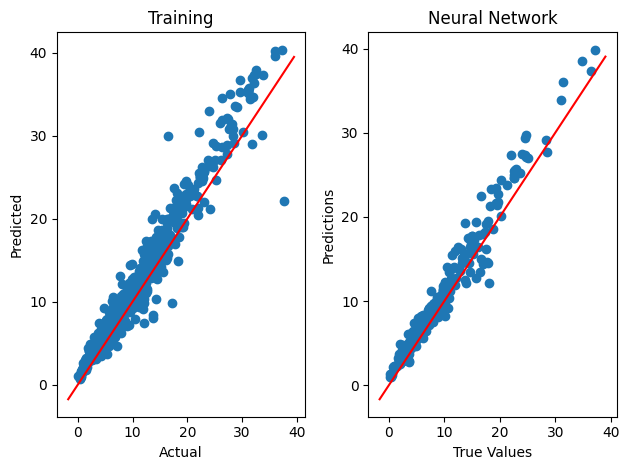

In [15]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("True Values", fontsize=10)
axes[1].set_ylabel("Predictions",  fontsize=10)
axes[1].set_title("Neural Network")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

13/13 [==============================] - 0s 4ms/step


C:\Users\enmao\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


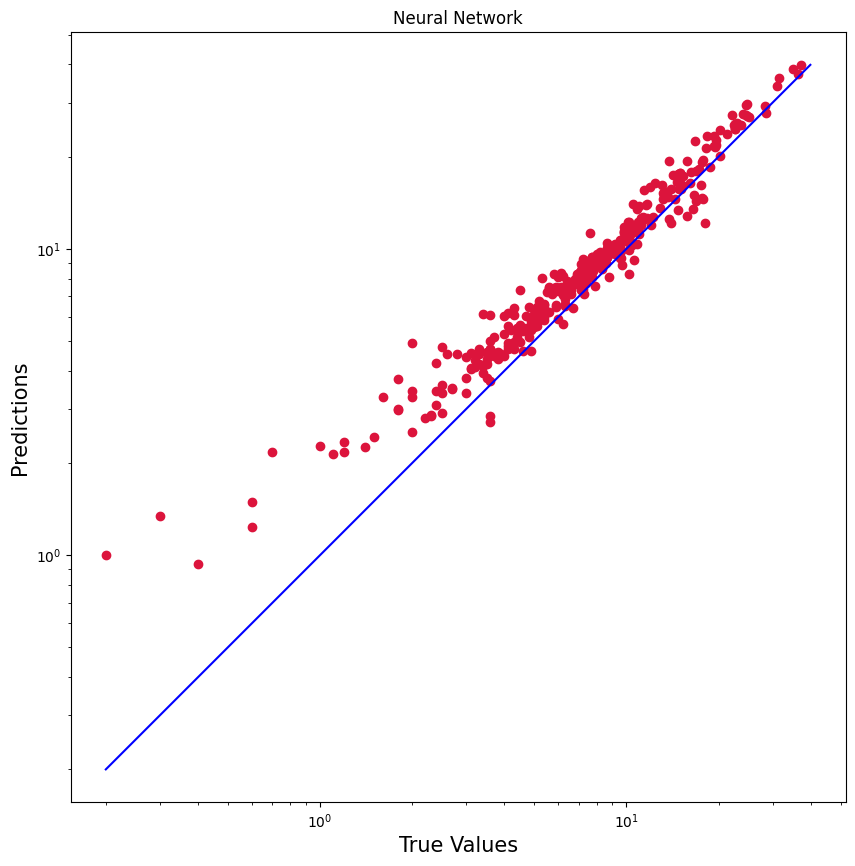

In [16]:
import matplotlib.pyplot as plt
# Plot the predicted and real y
plt.figure(figsize=(10,10))
plt.scatter(y_test, model.predict(X_test), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(model.predict(X_test)))
p2 = min(min(model.predict(X_test)), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Neural Network')
plt.axis('equal')

plt.show()



In [18]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score
def mse(y, y_pred):
   # Find the value of r squared
    print("R2-Square Value:", round(r2_score(y , y_pred),6))

    # Metrics to give an overall sense of error in the model
    #rss = np.sum(np.square(y - y_pred))
    #print("RSS:", round(rss,3))
    mse = mean_squared_error(y, y_pred)
    print("MSE:", round(mse,6))
    #rmse = mse**0.5
    #print("EMSE:", round(rmse,3))
    
mse(y_test, model.predict(X_test))

13/13 [==============================] - 0s 3ms/step
R2-Square Value: 0.92527
MSE: 2.692426
